## Modern Portfolio Theory (MPT) analysis with python

Modern portfolio theory (MPT) also known as Mean-Variance Portfolio Theory (MVP) is a mathematical framework by Markowitz introduced in a 1952 essay, for which he was awarded a Nobel Prize in economics. [Wikipedia entry](https://en.wikipedia.org/wiki/Harry_Markowitz)

### Necessary Imports

Import the required **modules/packages**.

In [22]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline
import warnings; warnings.simplefilter('ignore')

## Retrieving Stock Price Data

Here, I'm retrieving stock price data to build a portfolio of **tech companies**.

In [23]:
symbols = ['AAPL', 'AMZN', 'GOOG', 'IBM', 'MSFT']  # stock symbols
data = pd.DataFrame()  # empty DataFrame
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='google')['Close']

Print the columns in the `Dataframe`

In [24]:
data.columns

Index([u'AAPL', u'AMZN', u'GOOG', u'IBM', u'MSFT'], dtype='object')

Display the **final five rows** of the `DataFrame`

In [25]:
data.tail()  # the final five rows

,AAPL,AMZN,GOOG,IBM,MSFT
Date,,,,,
2017-06-13,146.59,980.79,953.40,154.25,70.65
2017-06-14,145.16,976.47,950.76,153.81,70.27
2017-06-15,144.29,964.17,942.31,154.22,69.90
2017-06-16,142.27,987.71,939.78,155.38,70.00
2017-06-19,146.34,995.17,957.37,154.84,70.87


A graphical comparison of the time series data with the starting values of 100.

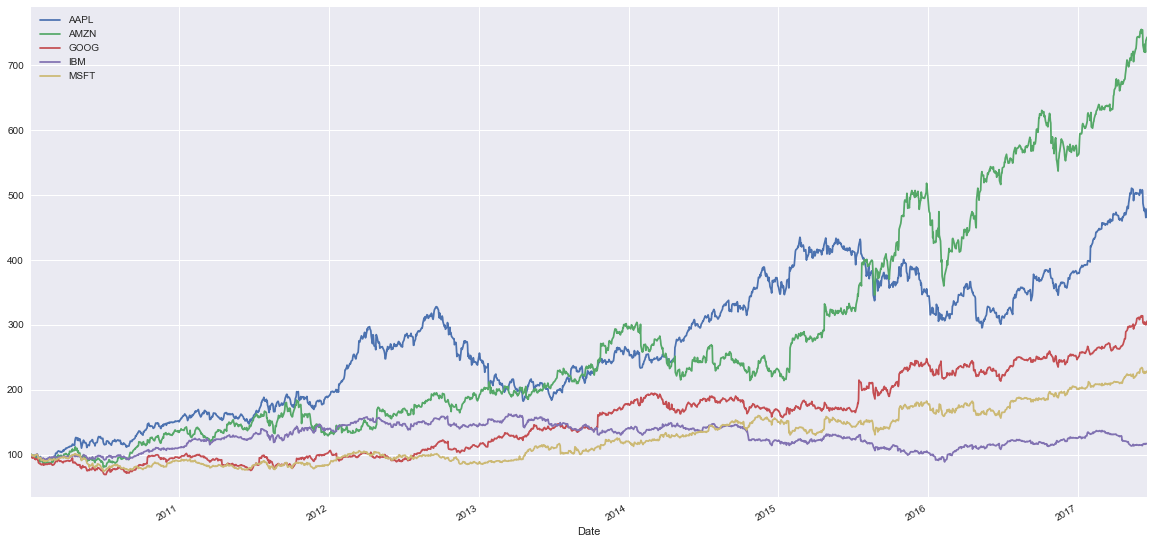

In [26]:
(data / data.ix[0] * 100).plot(figsize=(20, 10));

## Portfolio Returns

To calculate a portfolio return, let's compute the annualized returns of the stocks based on the log returns for the respective time series.

vectorized calculation of the log returns

In [27]:
log_rets = np.log(data / data.shift(1))

Annualized average log returns

In [28]:
rets = log_rets.mean() * 252
rets

AAPL    0.210347
AMZN    0.269439
GOOG    0.150152
IBM     0.020980
MSFT    0.111288
dtype: float64